# All Machine Learning tutorial codes and some docs

## feature engineering

Lets introduce some scalings:

1. Min - max scaling : this scaling is supported to set the range of data sets to be between 1 and 0. first we must find the Absolute term of the min and max number then we calculate the division of the difference between Xi and min amount over the difference of max and min.

2. normalization: here we must calculate the division of the Xi oer the Distance or norm or length of the data point (Euclidean or manhattan or more.) this will make the it fits within size of 1.

3. standardization : calculate the mean and std. then subtract the datapoint from the mean and divide it from the std. it will make it close to normal dist. so the mean tend to me 0 and std tends to be 1.

4. robust scaling: we must calculate teh median adn Inter-Quartile Range. subtract the data point from the median point and divide it from the IQR.


Rule of Thumb:

Use Min–Max if the model expects bounded input (e.g., Neural Nets, KNN).

Use Standardization if the model assumes Gaussian-like features or uses distances.

Use Robust if outliers are a big issue.

Use Normalization only if comparing direction (e.g., cosine similarity).

In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import pandas as pd

data = pd.read_csv('data.csv')
df = pd.DataFrame(data)


# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
normalizer = Normalizer()

# Apply Min-Max Scaling
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
# Apply Standard Scaling
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
# Apply Robust Scaling
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
# Apply Normalization
df_normalized = pd.DataFrame(normalizer.fit_transform(df), columns=df.columns)

 

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

## Feature selection

in this field of feature selection, we are selecting those whose are most important to us and have importantcy and correlation and relation with the target column.
for consideration of them, we have multiple methods:

1. filter methods: these methods evaluate the each feature indepeendetly with target variable. a high correlation with taget is picked. it will select the best subset that has the most correlated ne between all features and feed it to algorithm. some methods like information gain, chi-squared method, pearson correlation coefficent, fischer score and variance thereshold are considered.

2. wrapped methods: these are greedsy ones. they use different combination of the features and compute the relation between the subsets and target BASED ON THE colcluion addition andremoval of the feature are done. methods like Forward selection (start with an empty set of featres, keep adding the best features to it) and backward selection(the reverse method of forward selection) and recursive elimination (a greedy one with selects features by recursivley removing the least important ones).

3. Embedded methods (combination of the both ebove during the training): Embedded methods perform feature selection during the model training process. They combine the benefits of both filter and wrapper methods. methods like Lasso regression (L1 reulrazation, Descition treees, random forests, gradient boosting)


Rule of thumb :     

    Dataset Size: Filter methods are often preferred for very large datasets due to their speed.
    Feature Interactions: Wrapper and embedded methods are better for capturing complex feature interactions.
    Model Type: Some methods like Lasso and decision trees are more suitable for certain models like linear models or tree-based models.

#### Information gain and Mutual Information
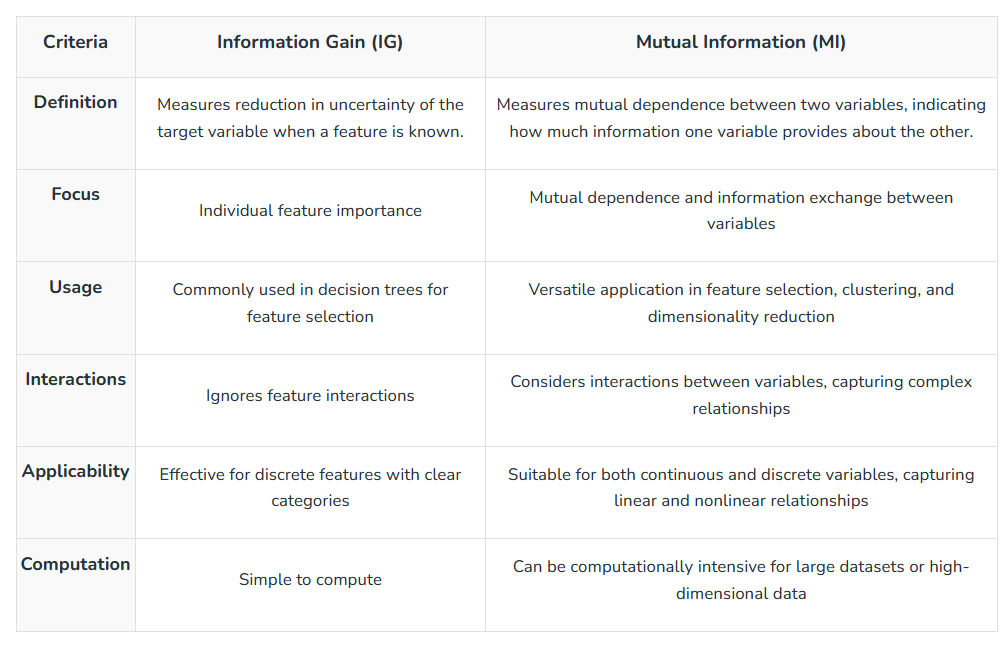

In [ ]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.datasets import load_iris
import pandas as pd


iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Calculate information gain for classification
mi_classif = mutual_info_classif(X, y)
# Calculate Mutual Information 
mi_regression = mutual_info_regression(X, y)

print('information gain for classification:', mi_classif)
print('Mutual Information for regression:', mi_regression)


: 

### CHI-Squared method

The Chi-Square Test is a statistical method used to check how independent a feature is from the target variable.

    💡 In short:
    “Does this feature help predict the target?”

It’s commonly used for:

    Classification problems ✅

    Categorical target variables ✅

    Non-negative, discrete input features (like counts) ✅


If a feature and the target are dependent, the chi-square score will be high, meaning the feature is important.

If they are independent, the score will be low (or zero), so we can drop the feature.

### Pearson correlation coefficient

<p>
The Pearson correlation coefficient, often represented by the letter <strong>r</strong>, is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. It ranges from <strong>-1</strong> to <strong>+1</strong>, with values closer to <strong>0</strong> indicating a weak relationship, values close to <strong>+1</strong> indicating a strong positive relationship, and values close to <strong>-1</strong> indicating a strong negative relationship.
</p>

<h4>Key Aspects</h4>
<ul>
<li>
  <h5>Linearity</h5>
  <p>
    Pearson's correlation measures the strength of a linear relationship between two variables. It is suitable for data where the relationship can be approximated by a straight line.
  </p>
</li>
<li>
  <h5>Strength of Relationship</h5>
  <p>
    The magnitude of the correlation coefficient indicates the strength of the relationship. Values closer to <strong>1</strong> or <strong>-1</strong> suggest a stronger relationship, while values closer to <strong>0</strong> suggest a weaker relationship.
  </p>
</li>
<li>
  <h5>Direction of Relationship</h5>
  <p>
    The sign of the correlation coefficient indicates the direction of the relationship. A positive value indicates that as one variable increases, the other tends to increase, while a negative value indicates that as one variable increases, the other tends to decrease.
  </p>
</li>


### Variance threshhold

It is so easy. just caluclate the variance for each feature in thedataset and compare each variance to the predefined theredhold. the features below the variance threshold will be discarded.

### Fisher’s Score
Fisher’s Score is a supervised feature selection method.
It tells you how well a single feature separates different classes.
1. High score → The feature’s values are very different between classes and consistent within each class.
2. Low score → The feature’s values are similar across classes or have a lot of overlap.

In [ ]:
pip install numpy pandas scikit-learn matplotlib seaborn torch torchvision torchaudio transformers datasets scikit-image opencv-python

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import chi2, SelectKBest, VarianceThreshold
from scipy.stats import pearsonr

# Load a simple dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# ---- 1. Chi-Square Test ----
# Chi-square requires non-negative features, so we ensure that by adding a small constant
X_non_negative = X - X.min() + 1e-9
chi2_selector = SelectKBest(score_func=chi2, k=2)
X_chi2 = chi2_selector.fit_transform(X_non_negative, y)
chi2_scores = chi2_selector.scores_

# ---- 2. Pearson Correlation Coefficient ----
pearson_scores = []
for col in X.columns:
    score, _ = pearsonr(X[col], y)
    pearson_scores.append(score)

# ---- 3. Variance Threshold ----
var_thresh = VarianceThreshold(threshold=0.2)  # example threshold
X_var = var_thresh.fit_transform(X)
var_scores = X.var().values


import pandas as pd
results_df = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi2_scores,
    "Pearson Corr": pearson_scores,
    "Variance": var_scores
})


ModuleNotFoundError: No module named 'sklearn.feature_selection'

# Metrics

<h3>Area Under the Curve (AUC)</h3>
<p>
In machine learning, the Area Under the Curve (AUC) is a performance metric used to evaluate binary classification models. It quantifies how well a model can distinguish between positive and negative classes across all possible classification thresholds. The AUC is calculated by measuring the area under the Receiver Operating Characteristic (ROC) curve.
</p>

<h4>Key Aspects of AUC</h4>
<ul>
<li>
<h4>Binary Classification</h4>
<p>
AUC is primarily used for evaluating binary classification tasks, where the goal is to predict one of two outcomes (e.g., yes/no, positive/negative).
</p>
</li>
<li>
<h4>ROC Curve</h4>
<p>
The ROC curve is a graphical plot that shows the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at different classification thresholds.
</p>
</li>
<li>
<h4>AUC Value</h4>
<p>
AUC is a single number representing the area under the ROC curve. It ranges from <strong>0</strong> to <strong>1</strong>, with higher values indicating better model performance.
</p>
</li>

<h3>Receiver Operating Characteristic (ROC) Curve</h3>
<p>
A Receiver Operating Characteristic (ROC) curve is a graphical representation that helps evaluate the performance of a binary classification model. It plots the true positive rate (sensitivity) against the false positive rate (1–specificity) at various threshold settings, showing how well a model distinguishes between positive and negative cases as the threshold changes.
</p>

<h4>Purpose</h4>
<p>
ROC curves are used to assess the accuracy and effectiveness of a diagnostic test or classification model. They help illustrate the trade-off between correctly identifying positive cases (high sensitivity) and incorrectly labeling negatives as positives (low false positive rate).
</p>

<h4>How It’s Created</h4>
<p>
The ROC curve is generated by varying the threshold for classifying an instance as positive. For each threshold, compute:
</p>
<p class="formula">

$$\text{TPR (Sensitivity)} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \quad
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} = 1 - \text{Specificity}$$

</p>